In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df = df.drop(columns=["deck"])  # Drop column with too many nulls
df["age"].fillna(df["age"].mean(), inplace=True)  # Fill age with mean
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)  # Fill embarked with mode
df.dropna(inplace=True)  # Drop any remaining rows with nulls

In [5]:
print(df.isnull().sum())  # Confirm no nulls

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


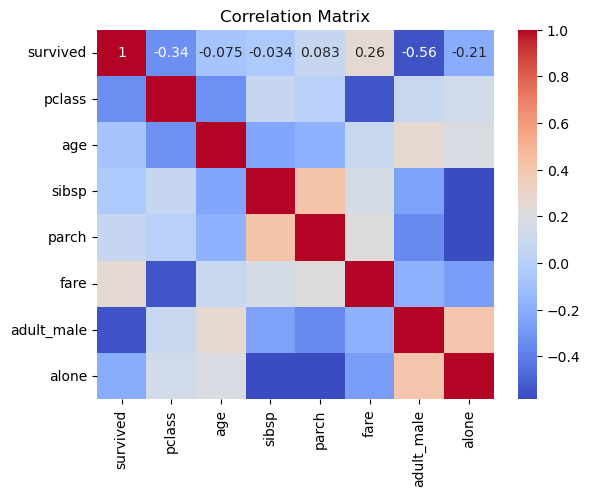

C:\Users\ssswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


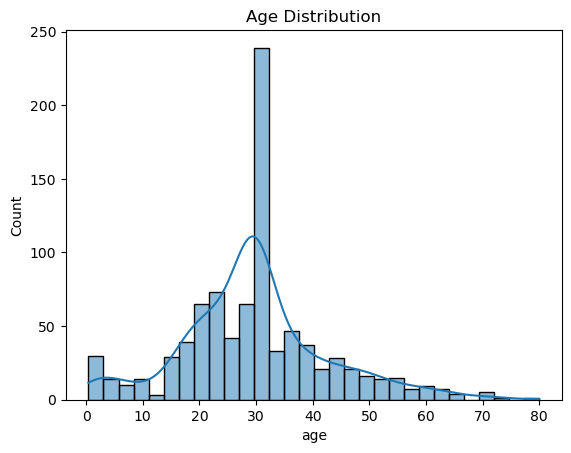

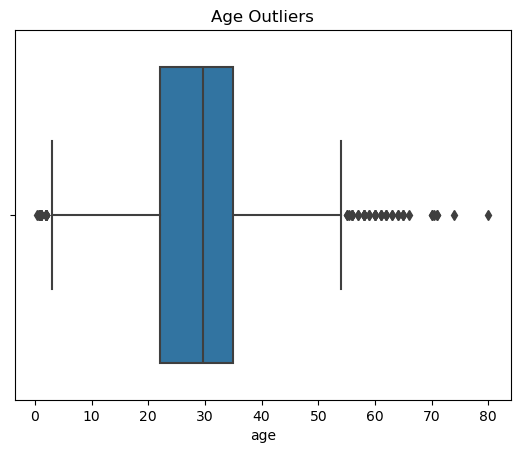

In [6]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Age distribution
sns.histplot(df.age.dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# Outliers using boxplot
sns.boxplot(x=df.age)
plt.title("Age Outliers")
plt.show()


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Titanic Dataset EDA')

In [14]:
!pip install ydata-profiling


     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.2 kB ? eta -:--:--
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------- -------------------- 30.7/65.2 kB 187.9 kB/s eta 0:00:01
     ----------------------------------- -- 61.4/65.2 kB 102.4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.11.3 which is incompatible.
